In [1]:
"""from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
from __future__ import print_function"""
from google.colab import files 
uploaded=files.upload()

ModuleNotFoundError: No module named 'google'

import pandas as pd
df_comorbidity=pd.read_csv('https://drive.google.com/file/d/1dcHkEbWf2hb9mun10WRB8BctybPVeoXp/view?usp=sharing/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv',sep=',')

In [ ]:
import io
import pandas as pd
import numpy as np
df_comorbidity=pd.read_csv(io.BytesIO(uploaded['Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv']))
#np.seterr(invalid='ignore')

In [ ]:
df_comorbidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285660 entries, 0 to 285659
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          285660 non-null  object 
 1   Start Date          285660 non-null  object 
 2   End Date            285660 non-null  object 
 3   Group               285660 non-null  object 
 4   Year                273240 non-null  float64
 5   Month               248400 non-null  float64
 6   State               285660 non-null  object 
 7   Condition Group     285660 non-null  object 
 8   Condition           285660 non-null  object 
 9   ICD10_codes         285660 non-null  object 
 10  Age Group           285660 non-null  object 
 11  COVID-19 Deaths     207365 non-null  float64
 12  Number of Mentions  209573 non-null  float64
 13  Flag                78295 non-null   object 
dtypes: float64(4), object(10)
memory usage: 30.5+ MB


In [ ]:
df_comorbidity.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,273240.000000,248400.000000,207365.000000,209573.000000
mean,2020.409091,5.700000,136.662484,145.414734
std,0.491667,3.195315,2576.236333,2729.191067
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2020.000000,5.500000,0.000000,0.000000
75%,2021.000000,8.000000,21.000000,22.000000
max,2021.000000,12.000000,629803.000000,629803.000000


In [ ]:
df_comorbidity.isna().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  37260
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths        78295
Number of Mentions     76087
Flag                  207365
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd05251110>,
      dtype=object)

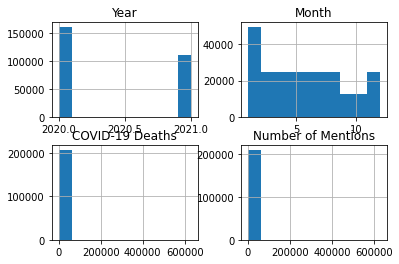

In [ ]:
df_comorbidity.hist()

In [ ]:
df_comorbidity.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,520.0,540.0,NaN
1,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,2348.0,2405.0,NaN
2,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,6191.0,6367.0,NaN
3,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,17515.0,18048.0,NaN
4,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,42471.0,43677.0,NaN


ELIMINANDO COLUMNAS QUE NO PERTENECEN AL ESTUDIO

dado que la columna flag, no nos representa ningun tipo de utilidad procedemos a elimnarla la del dataframe.

In [ ]:
df_comorbidity=df_comorbidity.drop(columns=['Flag'])

In [ ]:
df_comorbidity

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,520.0,540.0
1,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,2348.0,2405.0
2,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,6191.0,6367.0
3,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,17515.0,18048.0
4,08/29/2021,01/01/2020,08/28/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,42471.0,43677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285655,08/29/2021,04/01/2021,04/30/2021,By Month,2021.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197.0
285656,08/29/2021,05/01/2021,05/31/2021,By Month,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,184.0,184.0
285657,08/29/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0
285658,08/29/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0


ELIMINACION DEL FILAS CON VALORES NULOS

Debido a que el programa nos exige no tener valores nulos procedemos a eliminar las filas con esos valores nulos.

In [ ]:
df_comorbidity=df_comorbidity.dropna()

In [ ]:
df_comorbidity

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
37260,08/29/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0
37261,08/29/2021,02/01/2020,02/29/2020,By Month,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0
37262,08/29/2021,03/01/2020,03/31/2020,By Month,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9.0,9.0
37263,08/29/2021,04/01/2020,04/30/2020,By Month,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27.0,30.0
37264,08/29/2021,05/01/2020,05/31/2020,By Month,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285655,08/29/2021,04/01/2021,04/30/2021,By Month,2021.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197.0
285656,08/29/2021,05/01/2021,05/31/2021,By Month,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,184.0,184.0
285657,08/29/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0
285658,08/29/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0


AGRUPACION GENERAL

para obtener un resultado general, procecemos a agrupar las variables por medio de una de las variables general en las cuales encontramos una alta correlación, en este caso la edad.

In [ ]:
df_comorbidity1=df_comorbidity.groupby(by=['Age Group']).agg({'COVID-19 Deaths':'sum',
                                                              'Number of Mentions':'sum'}).reset_index()

In [ ]:
df_comorbidity1

,Age Group,COVID-19 Deaths,Number of Mentions
0,0-24,5510.0,6454.0
1,25-34,24381.0,26869.0
2,35-44,73603.0,79625.0
3,45-54,227761.0,244990.0
4,55-64,599350.0,646185.0
5,65-74,1066268.0,1148266.0
6,75-84,1276831.0,1369009.0
7,85+,1286773.0,1375643.0
8,All Ages,4741332.0,5094420.0
9,Not stated,48.0,54.0


VISUALIZACION DE LA VARIABLE GENERAL

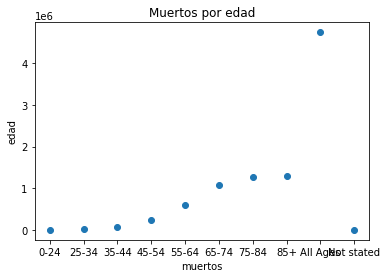

In [ ]:
import matplotlib_inline
import matplotlib.pyplot as plt

plt.scatter(x=df_comorbidity1['Age Group'],y=df_comorbidity1['COVID-19 Deaths'])
plt.title('Muertos por edad')
plt.xlabel('muertos')
plt.ylabel('edad')
plt.show()

Dado que hemos encontrado una variable que presenta inconsistencias (No Stated)procedemos a borrarla del estudio.

In [ ]:
df_comorbidity1=df_comorbidity1.drop(df_comorbidity1.index[[9]])
df_comorbidity1

,Age Group,COVID-19 Deaths,Number of Mentions
0,0-24,5510.0,6454.0
1,25-34,24381.0,26869.0
2,35-44,73603.0,79625.0
3,45-54,227761.0,244990.0
4,55-64,599350.0,646185.0
5,65-74,1066268.0,1148266.0
6,75-84,1276831.0,1369009.0
7,85+,1286773.0,1375643.0
8,All Ages,4741332.0,5094420.0


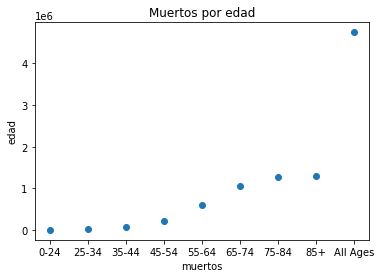

In [ ]:
import matplotlib_inline
import matplotlib.pyplot as plt

plt.scatter(x=df_comorbidity1['Age Group'],y=df_comorbidity1['COVID-19 Deaths'])
plt.title('Muertos por edad')
plt.xlabel('muertos')
plt.ylabel('edad')
plt.show()

Intalamos las librerias Kats Para realizar el analisis y la libreria Prophet que será la que realizará en terminos generales la estimación, con la cual la maquina aprenderá a predecir el futuro, de las variables.

In [ ]:
pip install kats


     |████████████████████████████████| 6.3 MB 4.5 MB/s 
     |████████████████████████████████| 866 kB 46.6 MB/s 
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 503 kB 66.6 MB/s 
     |████████████████████████████████| 3.4 MB 39.8 MB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 9.5 MB 4.2 MB/s 
     |████████████████████████████████| 26.3 MB 67 kB/s 
     |████████████████████████████████| 486 kB 68.8 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286607 sha256=4f1ba0d2104369a28e4d954edb9c633b71385c12cce6ebad6f7cf30d22c22e8e
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6638032 sha256=3d6c436035fe33f1d6dc15793fc6c6375f6f46f30c1f819f1b2b7154c0be1720
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f86

In [ ]:
pip install fbprophet

Debido a que el modelo Prophet se basa en analizar una variable con respecto al tiempo procedemos a importar la libreria datime de pandas, con lo cual convertiremos en serie temporal, la columna temporal.

In [ ]:
import datetime

In [ ]:
df_comorbidity2=df_comorbidity.groupby(by=['Start Date','End Date','Age Group','Month','Year']).agg({'COVID-19 Deaths':'sum',
                                                                                              'Number of Mentions':'sum'}).reset_index()

procedemos a segmentar las variables necesarias para el estudio por medio de la funcion de agrupamiento grupby,con la cualdejaremos las variables categoricas como indicadores y las columnas pivote en este caso las variables dependientes, en este caso las muertes y las menciones las sumaremos con base en los indicadores.

In [ ]:
# VISUALIZAMOS LA TABLA
df_comorbidity2

,Start Date,End Date,Age Group,Month,Year,COVID-19 Deaths,Number of Mentions
0,01/01/2020,01/31/2020,0-24,1.0,2020.0,0.0,0.0
1,01/01/2020,01/31/2020,25-34,1.0,2020.0,0.0,0.0
2,01/01/2020,01/31/2020,35-44,1.0,2020.0,0.0,0.0
3,01/01/2020,01/31/2020,45-54,1.0,2020.0,5.0,7.0
4,01/01/2020,01/31/2020,55-64,1.0,2020.0,7.0,7.0
...,...,...,...,...,...,...,...
195,12/01/2020,12/31/2020,65-74,12.0,2020.0,160700.0,173224.0
196,12/01/2020,12/31/2020,75-84,12.0,2020.0,215523.0,230972.0
197,12/01/2020,12/31/2020,85+,12.0,2020.0,232995.0,249163.0
198,12/01/2020,12/31/2020,All Ages,12.0,2020.0,740254.0,795632.0


CREANDO LA SERIE TEMPORAL

In [ ]:
df_comorbidity2['DataSeries']=pd.DatetimeIndex(df_comorbidity2['Start Date'])

VISUALIZAMOS LA SERIE TEMPORAL EN LA ULTIMA COLUMNA

In [ ]:
df_comorbidity2

,Start Date,End Date,Age Group,Month,Year,COVID-19 Deaths,Number of Mentions,DataSeries
0,01/01/2020,01/31/2020,0-24,1.0,2020.0,0.0,0.0,2020-01-01
1,01/01/2020,01/31/2020,25-34,1.0,2020.0,0.0,0.0,2020-01-01
2,01/01/2020,01/31/2020,35-44,1.0,2020.0,0.0,0.0,2020-01-01
3,01/01/2020,01/31/2020,45-54,1.0,2020.0,5.0,7.0,2020-01-01
4,01/01/2020,01/31/2020,55-64,1.0,2020.0,7.0,7.0,2020-01-01
...,...,...,...,...,...,...,...,...
195,12/01/2020,12/31/2020,65-74,12.0,2020.0,160700.0,173224.0,2020-12-01
196,12/01/2020,12/31/2020,75-84,12.0,2020.0,215523.0,230972.0,2020-12-01
197,12/01/2020,12/31/2020,85+,12.0,2020.0,232995.0,249163.0,2020-12-01
198,12/01/2020,12/31/2020,All Ages,12.0,2020.0,740254.0,795632.0,2020-12-01


REVISION DE VARIABLES

In [ ]:
df_comorbidity2.dtypes

Start Date                    object
End Date                      object
Age Group                     object
Month                        float64
Year                         float64
COVID-19 Deaths              float64
Number of Mentions           float64
DataSeries            datetime64[ns]
dtype: object

AISLANDO LAS VARIABLES NECESARIAS.

crearemos un nuevo dataframe con el cual aislaremos las variables que necesita Prophet model para realizar el analisis, en este caso enterminos generales, la cantidad de fallecidos y la serie temporal. 

In [ ]:
df_comorbidity3=df_comorbidity2[['COVID-19 Deaths','DataSeries']].dropna()
#df_comorbidity4['y']=df_comorbidity2[['COVID-19 Deaths']]
#df_comorbidity4['ds']=df_comorbidity2[['DataSeries']]
#df_comorbidity4.drop(['COVID-19 Deaths','DataSeries'],axis=1,inplace=True)
#df_comorbidity4


RENOMBRAMOS LAS VARIABLES.

dado que el modelo solamente acepta las dos variables que necesita, las cuales son la pendiente y la serie temporal ds, procedemos a renombrarlas.

In [ ]:
df_comorbidity3=df_comorbidity3.rename(columns={'COVID-19 Deaths':'y','DataSeries':'ds'})

In [ ]:
df_comorbidity3

,y,ds
0,0.0,2020-01-01
1,0.0,2020-01-01
2,0.0,2020-01-01
3,5.0,2020-01-01
4,7.0,2020-01-01
...,...,...
195,160700.0,2020-12-01
196,215523.0,2020-12-01
197,232995.0,2020-12-01
198,740254.0,2020-12-01


In [ ]:
from fbprophet import Prophet

ENTRENANDO EL MODELO


In [ ]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df_comorbidity3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Inicialmente le solicitamos al modelo que esconda el 5% de los datos para que pueda hacer un pronostico lo mas ajustado posible, con una estacionalidad diaria.

con el metodo fit() le pasamos la variable que debe transformar, en este caso el dataframe comorbidity3.


PRONOSTICO


In [ ]:
future=m.make_future_dataframe(periods=1000,freq='D')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,4315.436600,-179285.245621,216775.527876,4315.436600,4315.436600,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,0.0,0.0,0.0,21579.426166
1,2020-02-01,8759.940015,-183941.198178,221088.095723,8759.940015,8759.940015,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,0.0,0.0,0.0,26023.929581
2,2020-03-01,12917.700817,-162496.848109,228694.913241,12917.700817,12917.700817,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,0.0,0.0,0.0,30181.690383
3,2020-04-01,17362.198752,-163271.676344,226001.505216,17362.198752,17362.198752,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,0.0,0.0,0.0,34626.188318
4,2020-05-01,21663.325559,-162214.087008,235477.380829,21663.325559,21663.325559,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,17263.989566,0.0,0.0,0.0,38927.315125


Con los datos obtenidos le solictamos predecir el comportamiento de los proximos 3 años.

RESUMEN

In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-01-01,21579.426166
1,2020-02-01,26023.929581
2,2020-03-01,30181.690383
3,2020-04-01,34626.188318
4,2020-05-01,38927.315125
...,...,...
1015,2024-04-23,-117039.347631
1016,2024-04-24,-117189.752701
1017,2024-04-25,-117340.157771
1018,2024-04-26,-117490.562840


De acuerdo a la tabla de resumen en los proximos 3 años se presentará un descenso en las muertes generales por covid, por lo que procederemos a verificar en el plot del pronostico.


PLOT DEL PRONOSTICO

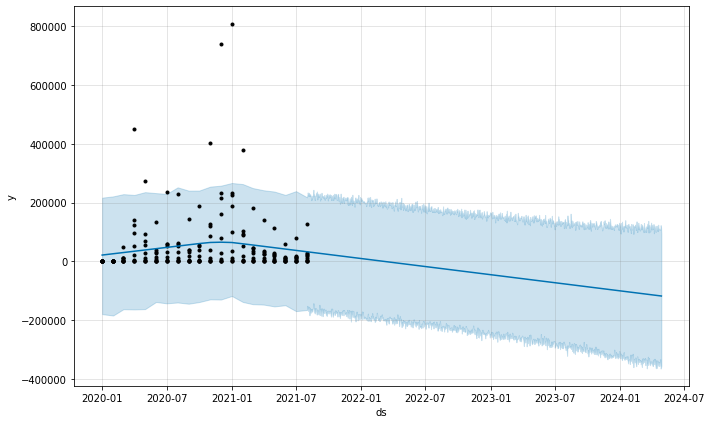

In [ ]:
plot1=m.plot(forecast)

De acuerdo a la Grafica el modelo prophet nos pronostica un fuerte descenso en las muertes por covid, en los estados unidos, independientemente de las comorbilidades, por lo que deberemos estudiar en el caso especifico del grupo de comorbilidades, como será esta tendencia.

por otro lado realizaremos los pertinentes diagnosticos para saber que tan alejados estan los pronosticos de la realidad, y así determinar si la maquina tuvo un aprendizaje efectivo.

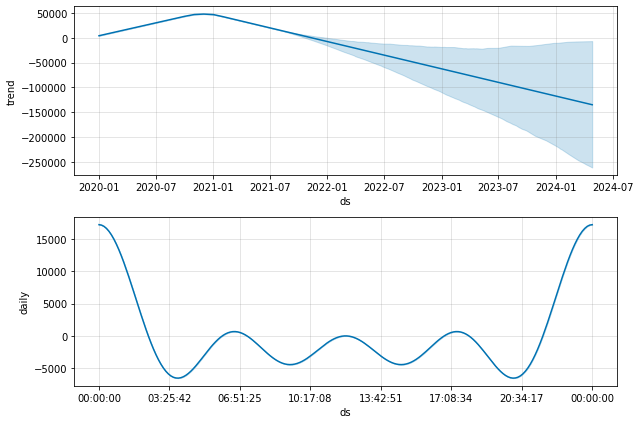

In [ ]:
plot2=m.plot_components(forecast)

Tal como podemos observar en la tabla de resultados la tendencia y los casos de muerte diarios cada vez serán mas largos, pasando de 3 a 6 horas por muerte a causa del covid.

VALIDACION CRUZADA

**ξ(h) = E[φ(T, h)].**




Kats model


In [ ]:
200*0.8


160.0

In [ ]:
from kats.consts import TimeSeriesData

In [ ]:
from kats.models.prophet import ProphetModel, ProphetParams


In [ ]:
pip install scikit-learn

In [ ]:
ds=df_comorbidity3['ds']
y=df_comorbidity3['y']
ts=ds

In [ ]:
params = ProphetParams(seasonality_mode='multiplicative')

In [ ]:
m = ProphetModel(ts, params)

Como podemos ver, al pasarle a la herramienta de analisis kats, los parametros propios del modelo Prophet, como lo son la variable dependiente='y', y la serie temporal='ds', nos retorna un error de versión, en el cual nos comenta que no tiene el validador de datos, por lo que no puede saber, si se trata de una serie temporal o de otro tipo de objeto, dado esto no podremos continuar con el proceso, dado que la herramienta, presenta inconsistencias de versión, pese a que descargamos la mas actualizada.

In [ ]:
# No funciona
train_len = 160
train = df_comorbidity3.iloc[:train_len]
test = df_comorbidity3.iloc[train_len:]

In [ ]:
#No funciona
ts = TimeSeriesData(train.reset_index(), time_col_name="ds") 

In [ ]:
#ts['y'].astype(int) no funciona
ts


,ds,index,y
0,2020-01-01,0,0.0
1,2020-01-01,8,25.0
2,2020-01-01,7,0.0
3,2020-01-01,6,8.0
4,2020-01-01,5,5.0
...,...,...,...
155,2021-08-01,152,6134.0
156,2021-08-01,151,2077.0
157,2021-08-01,158,127941.0
158,2021-08-01,153,12980.0


In [ ]:
# no sirve el plto ts.plot(cols=["y"])

In [ ]:
from kats.models.prophet import ProphetModel, ProphetParams

In [ ]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
import warnings

In [ ]:
#warnings.simplefilter(action='ignore')

In [ ]:
#params = ProphetParams(seasonality_mode="multiplicative")

Pronostico de las muertes por grupo de enfermedades Residuales

In [ ]:
def conditiongroup(fila): # Función def recorre de forma controlada el objeto que definimos como Fila
    f=fila['Condition Group'] # r= posición que repetirá el numero de filas que tenga la columna.
    if f=='All other conditions and causes (residual)': # condicion: si encuentra las palabras a la derecha de r==, entonces:
        fi=1 #respuesta que debe colocar 1
        return fi # Retorne la respuesta
    else: # Sino
        fi=0 # retorne 0 
        return fi
df_comorbidity.loc[:,['CausesResidualsGroup']]=df_comorbidity.apply(conditiongroup,axis=1)
# la nueva columna creada es: df_comorbidity['OtherConditions_ResidualGroup'
# inserte la respuesta de las condiciones dadas en la funcion def, dentro del dataframe df_comorbidity.apply(estatecountry,axis=1), de la nueva columna creada 


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_comorbidity

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup
37260,08/29/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
37261,08/29/2021,02/01/2020,02/29/2020,By Month,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0
37262,08/29/2021,03/01/2020,03/31/2020,By Month,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9.0,9.0,0
37263,08/29/2021,04/01/2020,04/30/2020,By Month,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27.0,30.0,0
37264,08/29/2021,05/01/2020,05/31/2020,By Month,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19.0,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285655,08/29/2021,04/01/2021,04/30/2021,By Month,2021.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197.0,0
285656,08/29/2021,05/01/2021,05/31/2021,By Month,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,184.0,184.0,0
285657,08/29/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0,0
285658,08/29/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0,0


In [ ]:
df_comorbidity['CausesResidualsGroup'].sum()

7763

In [ ]:
df_comorbidity4=df_comorbidity.groupby(by=['Start Date','End Date','Year','Month',]).agg({'COVID-19 Deaths':'sum',
                                                                                            'Number of Mentions':'sum',
                                                                                            'CausesResidualsGroup':'sum'}).reset_index()
df_comorbidity4                                                                                            

,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343


In [ ]:
def tasadefucion(fila):
  causes=fila['CausesResidualsGroup']
  deaths=fila['COVID-19 Deaths']
  if causes<deaths:
    percent_rate=((causes/deaths)*100)
    return percent_rate
  else:
    percent_rate=0
    return percent_rate
df_comorbidity4.loc[:,['%DeathsComorbidityResidual']]=df_comorbidity4.apply(tasadefucion,axis=1)

In [ ]:
df_comorbidity4

,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,%DeathsComorbidityResidual
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536,0.000000
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423,0.026337
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532,0.000000
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403,0.054048
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334,0.365315
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382,0.109394
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370,0.041409
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355,0.130142
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381,0.070514
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343,0.157820


In [ ]:
df_comorbidity4['ds']=pd.DatetimeIndex(df_comorbidity4['Start Date'])
df_comorbidity4['y']=df_comorbidity4['%DeathsComorbidityResidual']
df_ResidualCausesGroup=df_comorbidity4[['ds','y']]
df_ResidualCausesGroup

,ds,y
0,2020-01-01,0.000000
1,2021-01-01,0.026337
2,2020-02-01,0.000000
3,2021-02-01,0.054048
4,2020-03-01,0.365315
5,2021-03-01,0.109394
6,2020-04-01,0.041409
7,2021-04-01,0.130142
8,2020-05-01,0.070514
9,2021-05-01,0.157820


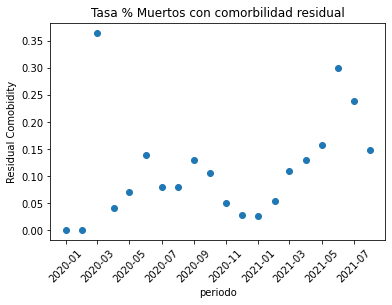

In [ ]:
import matplotlib_inline
import matplotlib.pyplot as plt

plt.scatter(x=df_ResidualCausesGroup['ds'],y=df_ResidualCausesGroup['y'])
plt.title('Tasa % Muertos con comorbilidad residual')
plt.xlabel('periodo')
plt.ylabel('Residual Comobidity')
plt.xticks(rotation=45)
plt.show()

PRONOSTICO DE MUERTES CON COMORBILIDAD RESIDUAL

ENTRENAMIENTO DEL MODELO

In [ ]:
m=Prophet(interval_width=0.8,daily_seasonality=True)
model=m.fit(df_ResidualCausesGroup)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


PRONOSTICO


In [ ]:
future=m.make_future_dataframe(periods=1000,freq='D')
forecast=m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,0.003737,-0.045189,0.176717,0.003737,0.003737,0.059787,0.059787,0.059787,0.059787,0.059787,0.059787,0.0,0.0,0.0,0.063524
1,2020-02-01,0.009023,-0.037858,0.181484,0.009023,0.009023,0.059787,0.059787,0.059787,0.059787,0.059787,0.059787,0.0,0.0,0.0,0.068811
2,2020-03-01,0.013969,-0.037911,0.194960,0.013969,0.013969,0.059787,0.059787,0.059787,0.059787,0.059787,0.059787,0.0,0.0,0.0,0.073756
3,2020-04-01,0.019256,-0.035277,0.196061,0.019256,0.019256,0.059787,0.059787,0.059787,0.059787,0.059787,0.059787,0.0,0.0,0.0,0.079043
4,2020-05-01,0.024372,-0.028317,0.196560,0.024372,0.024372,0.059787,0.059787,0.059787,0.059787,0.059787,0.059787,0.0,0.0,0.0,0.084159


RESUMEN

In [ ]:
forecast[['ds','yhat']]


,ds,yhat
0,2020-01-01,0.063524
1,2020-02-01,0.068811
2,2020-03-01,0.073756
3,2020-04-01,0.079043
4,2020-05-01,0.084159
...,...,...
1015,2024-04-23,0.331951
1016,2024-04-24,0.332122
1017,2024-04-25,0.332292
1018,2024-04-26,0.332463


PLOT DEL PRONOSTICO


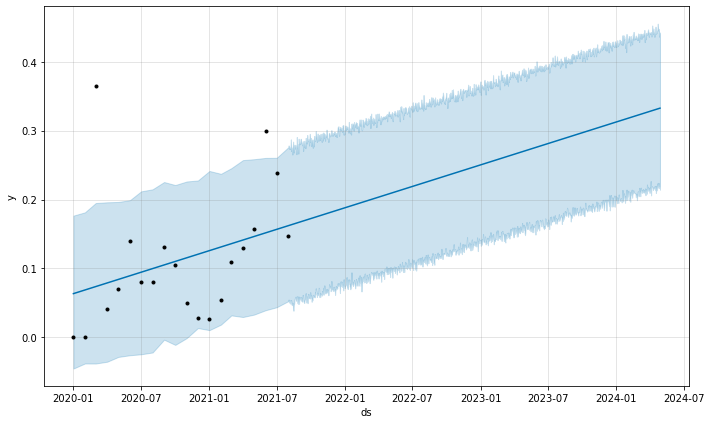

In [ ]:
plot3=m.plot(forecast)

Como podemos ver pese a que hay una fuerte tendencia generalizada a la reducción de muertes generales por covid, en su proceso de entrenamiento, sin poder ver el 20% de los datos, la maquina, detectó perfectamente el mismo patron de tendencia que la grafica general, por lo que pronostica un aumento generalizado de muertes por comorbilidades del grupo causas residuales, tales como:
1. Colera
2.INFECCION MENINGOCOCICA
3. ACTINOMICOSIS
4. OTRAS ENFERMEDADES INFECCIOSAS Y LAS NO ESPECIFICADAS
5. CARCINOMA IN SITU DEL LABIO, DE LA CAVIDAD BUCAL Y DE LA FARINGE
6. OTROS TRASTORNOS TIROIDEOS
7. COMA HIPOGLICEMICO NO DIABETICO
8. SECUELAS DE LA DESNUTRICION Y OTRAS DEFICIENCIAS NUTRICIONALES
9. TRASTORNOS DEL METABOLISMO DE LOS AMINOACIDOS AROMATICOS
10. TRASTORNOS NUTRICIONALES Y METABOLICOS EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE
11. DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER
12. DEMENCIA EN OTRAS ENFERMEDADES CLASIFICADAS OTRA PARTE
13. SINDROME AMNESICO ORGANICO, NO INDUCIDO POR EL ALCOHOL O POR OTRAS SUSTANCIAS PSICOACTIVAS
14. TRASTORNOS EXTRAPIRAMIDALES Y DEL MOVIMIENTO EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE
15. OTRAS ENFERMEDADES DEGENERATIVAS DEL SISTEMA NERVIOSO NO CLASIFICADAS EN OTRA PARTE
16. TRASTORNOS DEL OIDO Y DE LA APOFISIS MASTOIDES CONSECUTIVOS A PROCEDIMIENTOS NO CLASIFICADOS EN OTRA PARTE
17. TRASTORNOS DEL DESARROLLO Y DE LA ERUPCION DE LOS DIENTES
18. TRASTORNOS DE OTROS ORGANOS DIGESTIVOS EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE.
19. SINDROME ESTAFILOCOCICO DE LA PIEL ESCALDADA
20. LESIONES BIOMECANICAS NO CLASIFICADAS EN OTRA PARTE.
21. SINDROME NEFRITICO AGUDO.
22. TRASTORNOS RENALES TUBULOINTERSTICIALES EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE
23. CALCULO DEL RINON Y DEL URETER
24. COMPLICACION ASOCIADA CON LA FECUNDACION ARTIFICIAL
25. EMBARAZO ECTOPICO
26. OTRAS ENFERMEDADES MATERNAS CLASIFICABLES EN OTRA PARTE, PERO QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO
27. FETO Y RECIEN NACIDO AFECTADOS POR CONDICIONES DE LA MADRE NO NECESARIAMENTE RELACIONADAS CON EL EMBARAZO PRESENTE
28. OTRAS AFECCIONES ORIGINADAS EN EL PERIODO PERINATAL
29. ANENCEFALIA Y MALFORMACIONES CONGENITAS SIMILARES
30. OTRAS ANOMALIAS CROMOSOMICAS NO CLASIFICADAS EN OTRA PARTE
31. ANORMALIDADES DEL LATIDO CARDIACO
32. ASFIXIA
33. PLEURESIA
34. ESPUTO ANORMAL
35. OTROS SINTOMAS Y SIGNOS ESPECIFICADOS QUE INVOLUCRAN LOS SISTEMAS CIRCULATORIO Y RESPIRATORIO.
36. DOLOR ABDOMINAL Y PELVICO

PLOT DE LOS COMPONENTES

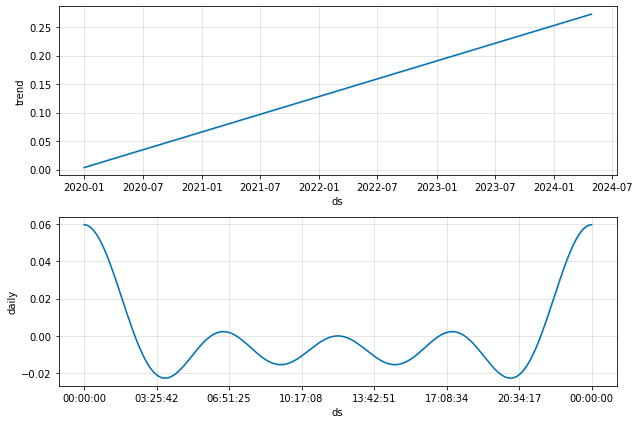

In [ ]:
plot4=m.plot_components(forecast)


La grafica de la tendencia nos muestra que los casos de muerte de los contagiados por covid con comorbilidad de causas residuale aumenta.

la grafica de tiempos nos muestra que en un dia entre cada 3 y 4 horas muere una persona en los estados unidos por contagio de covid con causas residuales.


VALIDACION CRUZADA

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='90 days', horizon = '365 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-01 00:00:00 and 2020-08-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 5.


Por medio de esta validación efecturaremos el estudio de precisión o Accuracy de la predicción generada por el modelo.

DEFINIDO COMO:

φ(T, h) = d(ˆy(T + h|T), y(T + h)).

Donde:

h= horizonte

T= tiempo

y= Variable des estudio

y'= predicción de la variable.

In [ ]:
df_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-01,0.112353,-0.021760,0.254209,0.131023,2020-08-01
1,2020-10-01,0.115372,-0.019642,0.256570,0.105579,2020-08-01
2,2020-11-01,0.118492,-0.004023,0.256190,0.049825,2020-08-01
3,2020-12-01,0.121511,-0.016849,0.251032,0.028029,2020-08-01
4,2021-01-01,0.124630,-0.018667,0.269205,0.026337,2020-08-01
5,2021-02-01,0.127750,-0.002202,0.265364,0.054048,2020-08-01
6,2021-03-01,0.130568,0.002540,0.269176,0.109394,2020-08-01
7,2021-04-01,0.133687,0.001559,0.270647,0.130142,2020-08-01
8,2021-05-01,0.136706,-0.005068,0.265844,0.157820,2020-08-01
9,2021-06-01,0.139826,0.012029,0.283526,0.299837,2020-08-01


In [ ]:
"""
Realizar cortes independientes
cutoffs = pd.to_datetime(['2020-08-01', '2020-08-01', '2020-08-01'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')
"""

METRICAS PERFORMANCE

las siguientes metricas sirven para medir la estimación realizada por el modelo, como lo son:

mse= error cuadrático medio.

rmse= error cuadrático mediana.

mae= error absoluto medio.

mape= el error porcentual absoluto medio.

mdape= el error porcentual absoluto medio de las estimaciones yhat_lower y yhat_upper.

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,0.000349,0.018671,0.018671,0.142498,0.142498,1.0
1,61 days,0.000096,0.009793,0.009793,0.092753,0.092753,1.0
2,92 days,0.004715,0.068666,0.068666,1.378149,1.378149,1.0
3,122 days,0.008739,0.093481,0.093481,3.335123,3.335123,1.0
4,153 days,0.009662,0.098294,0.098294,3.732214,3.732214,1.0
5,184 days,0.005432,0.073702,0.073702,1.363624,1.363624,1.0
6,212 days,0.000448,0.021174,0.021174,0.193553,0.193553,1.0
7,243 days,0.000013,0.003545,0.003545,0.027239,0.027239,1.0
8,273 days,0.000446,0.021114,0.021114,0.133783,0.133783,1.0
9,304 days,0.025603,0.160010,0.160010,0.533659,0.533659,0.0


METRICAS DE RENDIMIENTO DE LA VALIDACION CRUZADA.

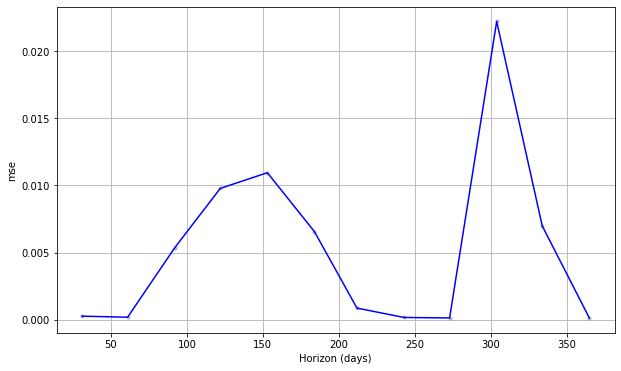

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig1 = plot_cross_validation_metric(df_cv, metric='mse')

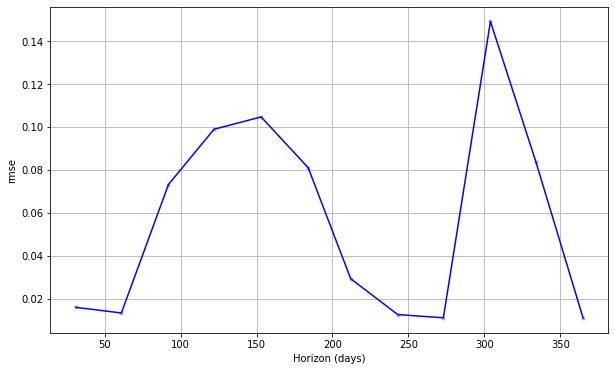

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig2 = plot_cross_validation_metric(df_cv, metric='rmse')

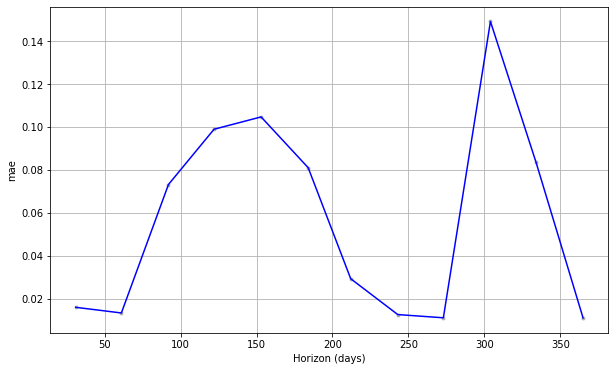

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mae')

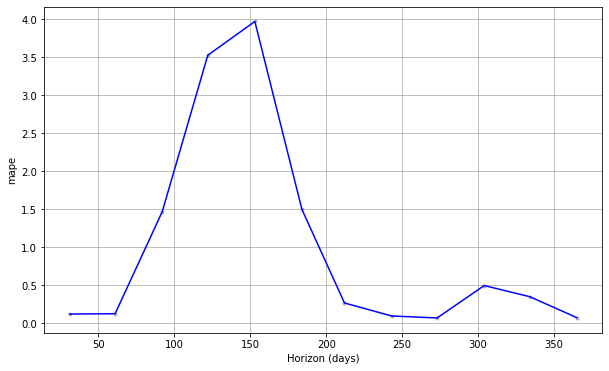

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig4 = plot_cross_validation_metric(df_cv, metric='mape')

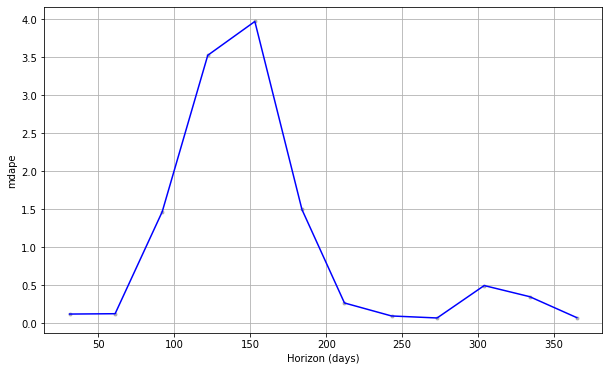

In [ ]:
#from prophet.plot import plot_cross_validation_metric
fig5 = plot_cross_validation_metric(df_cv, metric='mdape')

In [ ]:
parallel="processes"

In [ ]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

cutoffs = pd.to_datetime(['2020-08-01', '2020-08-01', '2020-08-01'])
#df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ResidualCausesGroup)  # Fit model with given params
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Dis

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.073374
1                     0.001                     0.10  0.073374
2                     0.001                     1.00  0.073374
3                     0.001                    10.00  0.073374
4                     0.010                     0.01  0.073374
5                     0.010                     0.10  0.073374
6                     0.010                     1.00  0.073374
7                     0.010                    10.00  0.073374
8                     0.100                     0.01  0.073374
9                     0.100                     0.10  0.073374
10                    0.100                     1.00  0.073374
11                    0.100                    10.00  0.073374
12                    0.500                     0.01  0.073374
13                    0.500                     0.10  0.073374
14                    0.500                     1.00  0

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}


In [ ]:
#{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}

DE AQUÍ EN ADELANTE ES REALIZAR EL MISMO PROCEDIMIENTO ANTERIOR

Grupo de enfermos de Alzheimer

In [ ]:
def conditiongroup(fila): # Función def recorre de forma controlada el objeto que definimos como Fila
    f=fila['Condition Group'] # r= posición que repetirá el numero de filas que tenga la columna.
    if f=='Alzheimer disease': # condicion: si encuentra las palabras a la derecha de r==, entonces:
        fi=1 #respuesta que debe colocar 1
        return fi # Retorne la respuesta
    else: # Sino
        fi=0 # retorne 0 
        return fi
df_comorbidity.loc[:,['AlzheimerDiseaseGroup']]=df_comorbidity.apply(conditiongroup,axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_comorbidity

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,AlzheimerDiseaseGroup
37260,08/29/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0,0
37261,08/29/2021,02/01/2020,02/29/2020,By Month,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0,0
37262,08/29/2021,03/01/2020,03/31/2020,By Month,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9.0,9.0,0,0
37263,08/29/2021,04/01/2020,04/30/2020,By Month,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27.0,30.0,0,0
37264,08/29/2021,05/01/2020,05/31/2020,By Month,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19.0,19.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285655,08/29/2021,04/01/2021,04/30/2021,By Month,2021.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197.0,0,0
285656,08/29/2021,05/01/2021,05/31/2021,By Month,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,184.0,184.0,0,0
285657,08/29/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0,0,0
285658,08/29/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0,0,0


CONTABILIZANDO LA CANTIDAD


In [ ]:
df_comorbidity['AlzheimerDiseaseGroup'].sum()

8886

AGRUPANDO PARA CREAR LA NUEVA TABLA


In [ ]:
df_comorbidity5=df_comorbidity.groupby(by=['Start Date','End Date','Year','Month',]).agg({'COVID-19 Deaths':'sum',
                                                                                            'Number of Mentions':'sum',
                                                                                            'CausesResidualsGroup':'sum',
                                                                                             'AlzheimerDiseaseGroup':'sum'
                                                                                             }).reset_index()
df_comorbidity5


,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,AlzheimerDiseaseGroup
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536,540
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423,439
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532,540
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403,424
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334,471
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382,405
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370,436
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355,407
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381,442
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343,421


OBTENIENDO LA TASA PORCENTUAL

In [ ]:
def tasadefuncion(fila):
  causes=fila['AlzheimerDiseaseGroup']
  deaths=fila['COVID-19 Deaths']
  if causes<deaths:
    percent_rate=((causes/deaths)*100)
    return percent_rate
  else:
    percent_rate=0
    return percent_rate
df_comorbidity5['%DeathsComorbidityAlzheimer']=df_comorbidity5.apply(tasadefuncion,axis=1)


VISUALIZANDO LA NUEVA TABLA


In [ ]:
df_comorbidity5

,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,AlzheimerDiseaseGroup,%DeathsComorbidityAlzheimer
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536,540,0.000000
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423,439,0.027333
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532,540,0.000000
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403,424,0.056865
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334,471,0.515159
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382,405,0.115981
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370,436,0.048796
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355,407,0.149206
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381,442,0.081803
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343,421,0.193709


CREANDO EL NUEVO DATAFRAME DEL MODELO PARA COMORBILIDAD ALZHEIMER

In [ ]:
df_comorbidity5['ds']=pd.DatetimeIndex(df_comorbidity5['Start Date'])
df_comorbidity5['y']=df_comorbidity5['%DeathsComorbidityAlzheimer']
df_AlzheimersGroup=df_comorbidity5[['ds','y']]
df_AlzheimersGroup



,ds,y
0,2020-01-01,0.000000
1,2021-01-01,0.027333
2,2020-02-01,0.000000
3,2021-02-01,0.056865
4,2020-03-01,0.515159
5,2021-03-01,0.115981
6,2020-04-01,0.048796
7,2021-04-01,0.149206
8,2020-05-01,0.081803
9,2021-05-01,0.193709


VISUALIZANDO LOS DATOS

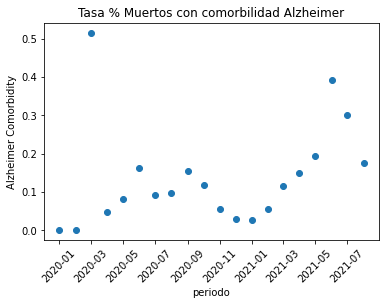

In [ ]:
import matplotlib_inline
import matplotlib.pyplot as plt

plt.scatter(x=df_AlzheimersGroup['ds'],y=df_AlzheimersGroup['y'])
plt.title('Tasa % Muertos con comorbilidad Alzheimer')
plt.xlabel('periodo')
plt.ylabel('Alzheimer Comorbidity')
plt.xticks(rotation=45)
plt.show()



ENTRENANDO EL MODELO.


In [ ]:
m=Prophet(interval_width=0.8,daily_seasonality=True)
model=m.fit(df_AlzheimersGroup)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


PRONOSTICO


In [ ]:
future=m.make_future_dataframe(periods=1000,freq='D')
forecast=m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,0.004961,-0.081405,0.244694,0.004961,0.004961,0.079377,0.079377,0.079377,0.079377,0.079377,0.079377,0.0,0.0,0.0,0.084338
1,2020-02-01,0.010851,-0.075485,0.244785,0.010851,0.010851,0.079377,0.079377,0.079377,0.079377,0.079377,0.079377,0.0,0.0,0.0,0.090228
2,2020-03-01,0.016362,-0.055927,0.265749,0.016362,0.016362,0.079377,0.079377,0.079377,0.079377,0.079377,0.079377,0.0,0.0,0.0,0.095738
3,2020-04-01,0.022252,-0.057186,0.260418,0.022252,0.022252,0.079377,0.079377,0.079377,0.079377,0.079377,0.079377,0.0,0.0,0.0,0.101629
4,2020-05-01,0.027952,-0.042472,0.256926,0.027952,0.027952,0.079377,0.079377,0.079377,0.079377,0.079377,0.079377,0.0,0.0,0.0,0.107329


RESUMEN


In [ ]:
forecast[['ds','yhat']]


,ds,yhat
0,2020-01-01,0.084338
1,2020-02-01,0.090228
2,2020-03-01,0.095738
3,2020-04-01,0.101629
4,2020-05-01,0.107329
...,...,...
1015,2024-04-23,0.383413
1016,2024-04-24,0.383603
1017,2024-04-25,0.383793
1018,2024-04-26,0.383983


PLOT DEL PRONOSTICO


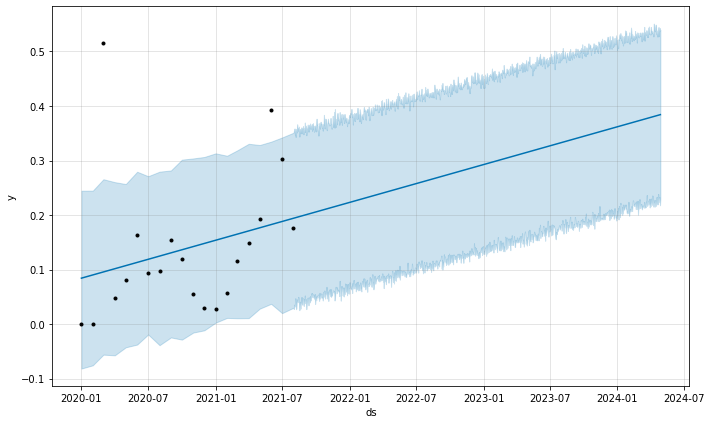

In [ ]:
plot5=m.plot(forecast)

PLOT DE LOS COMPONENTES


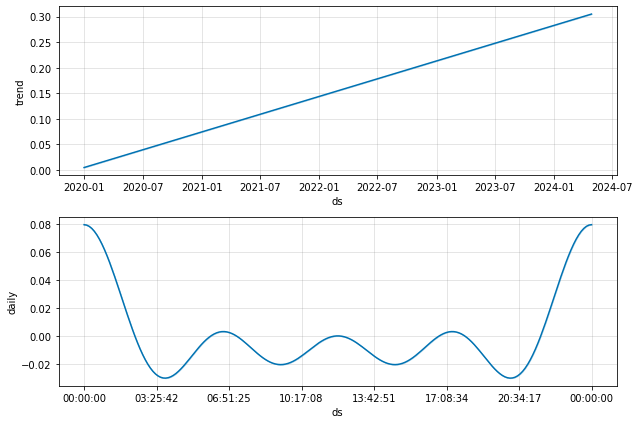

In [ ]:
plot6=m.plot_components(forecast)


LAS ENFERMEDADES DEL SISTEMA CIRCULATORIO COMO COMORBILIDAD ADQUIRIDA ANTERIORMENTE A LA ENTRADA DEL VIRUS.

In [ ]:
def conditiongroup(fila): # Función def recorre de forma controlada el objeto que definimos como Fila
    f=fila['Condition Group'] # r= posición que repetirá el numero de filas que tenga la columna.
    if f=='Circulatory diseases': # condicion: si encuentra las palabras a la derecha de r==, entonces:
        fi=1 #respuesta que debe colocar 1
        return fi # Retorne la respuesta
    else: # Sino
        fi=0 # retorne 0 
        return fi
df_comorbidity.loc[:,['CirculatoryDiseasesGroup']]=df_comorbidity.apply(conditiongroup,axis=1)



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_comorbidity

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,AlzheimerDiseaseGroup,CirculatoryDiseasesGroup
37260,08/29/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0,0,0
37261,08/29/2021,02/01/2020,02/29/2020,By Month,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0,0,0
37262,08/29/2021,03/01/2020,03/31/2020,By Month,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9.0,9.0,0,0,0
37263,08/29/2021,04/01/2020,04/30/2020,By Month,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27.0,30.0,0,0,0
37264,08/29/2021,05/01/2020,05/31/2020,By Month,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19.0,19.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285655,08/29/2021,04/01/2021,04/30/2021,By Month,2021.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197.0,0,0,0
285656,08/29/2021,05/01/2021,05/31/2021,By Month,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,184.0,184.0,0,0,0
285657,08/29/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0,0,0,0
285658,08/29/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0,0,0,0


In [ ]:
df_comorbidity['CirculatoryDiseasesGroup'].sum()

53611

In [ ]:
df_comorbidity6=df_comorbidity.groupby(by=['Start Date','End Date','Year','Month',]).agg({'COVID-19 Deaths':'sum',
                                                                                            'Number of Mentions':'sum',
                                                                                            'CausesResidualsGroup':'sum',
                                                                                            'CirculatoryDiseasesGroup':'sum'}).reset_index()
df_comorbidity6


,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,CirculatoryDiseasesGroup
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536,3762
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423,2764
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532,3756
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403,2646
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334,2845
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382,2447
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370,2646
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355,2342
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381,2661
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343,2355


In [ ]:
def tasadefucion(fila):
  causes=fila['CirculatoryDiseasesGroup']
  deaths=fila['COVID-19 Deaths']
  if causes<deaths:
    percent_rate=((causes/deaths)*100)
    return percent_rate
  else:
    percent_rate=0
    return percent_rate
df_comorbidity6.loc[:,['%DeathsComorbidityCirculatoryDiseases']]=df_comorbidity6.apply(tasadefucion,axis=1)


In [ ]:
df_comorbidity6

,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,CirculatoryDiseasesGroup,%DeathsComorbidityCirculatoryDiseases
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536,3762,0.000000
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423,2764,0.172090
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532,3756,0.000000
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403,2646,0.354868
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334,2845,3.111738
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382,2447,0.700753
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370,2646,0.296132
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355,2342,0.858574
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381,2661,0.492486
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343,2355,1.083576


In [ ]:
df_comorbidity6['ds']=pd.DatetimeIndex(df_comorbidity6['Start Date'])
df_comorbidity6['y']=df_comorbidity6['%DeathsComorbidityCirculatoryDiseases']
df_CirculatoryDiseasesGroup=df_comorbidity6[['ds','y']]
df_CirculatoryDiseasesGroup

,ds,y
0,2020-01-01,0.000000
1,2021-01-01,0.172090
2,2020-02-01,0.000000
3,2021-02-01,0.354868
4,2020-03-01,3.111738
5,2021-03-01,0.700753
6,2020-04-01,0.296132
7,2021-04-01,0.858574
8,2020-05-01,0.492486
9,2021-05-01,1.083576


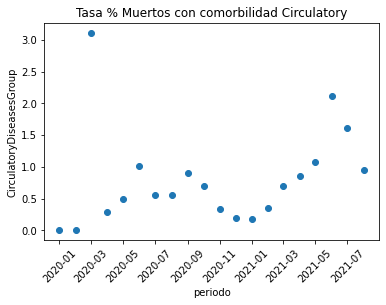

In [ ]:
import matplotlib_inline
import matplotlib.pyplot as plt

plt.scatter(x=df_CirculatoryDiseasesGroup['ds'],y=df_CirculatoryDiseasesGroup['y'])
plt.title('Tasa % Muertos con comorbilidad Circulatory')
plt.xlabel('periodo')
plt.ylabel('
CirculatoryDiseasesGroup')
plt.xticks(rotation=45)
plt.show()

In [ ]:
m=Prophet(interval_width=0.8,daily_seasonality=True)
model=m.fit(df_CirculatoryDiseasesGroup)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
future=m.make_future_dataframe(periods=1000,freq='D')
forecast=m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,0.032032,-0.351330,1.424326,0.032032,0.032032,0.512513,0.512513,0.512513,0.512513,0.512513,0.512513,0.0,0.0,0.0,0.544545
1,2020-02-01,0.059561,-0.347786,1.536587,0.059561,0.059561,0.512513,0.512513,0.512513,0.512513,0.512513,0.512513,0.0,0.0,0.0,0.572074
2,2020-03-01,0.085313,-0.346547,1.499381,0.085313,0.085313,0.512513,0.512513,0.512513,0.512513,0.512513,0.512513,0.0,0.0,0.0,0.597826
3,2020-04-01,0.112842,-0.309260,1.521132,0.112842,0.112842,0.512513,0.512513,0.512513,0.512513,0.512513,0.512513,0.0,0.0,0.0,0.625355
4,2020-05-01,0.139483,-0.327974,1.569115,0.139483,0.139483,0.512513,0.512513,0.512513,0.512513,0.512513,0.512513,0.0,0.0,0.0,0.651996


In [ ]:
forecast[['ds','yhat']]


,ds,yhat
0,2020-01-01,0.544545
1,2020-02-01,0.572074
2,2020-03-01,0.597826
3,2020-04-01,0.625355
4,2020-05-01,0.651996
...,...,...
1015,2024-04-23,1.942291
1016,2024-04-24,1.943179
1017,2024-04-25,1.944067
1018,2024-04-26,1.944955


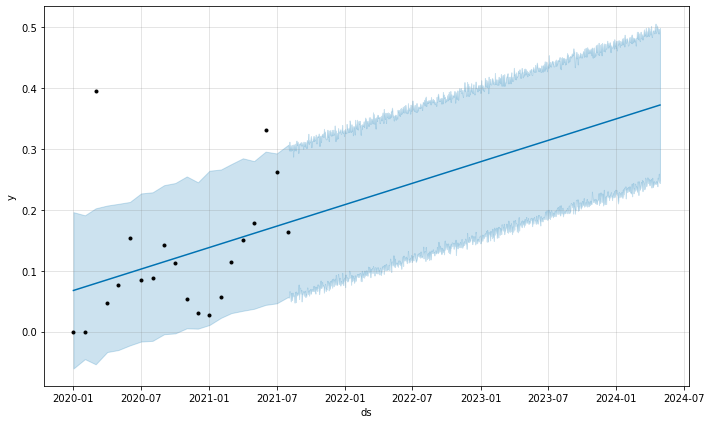

In [ ]:
plot7=m.plot(forecast)


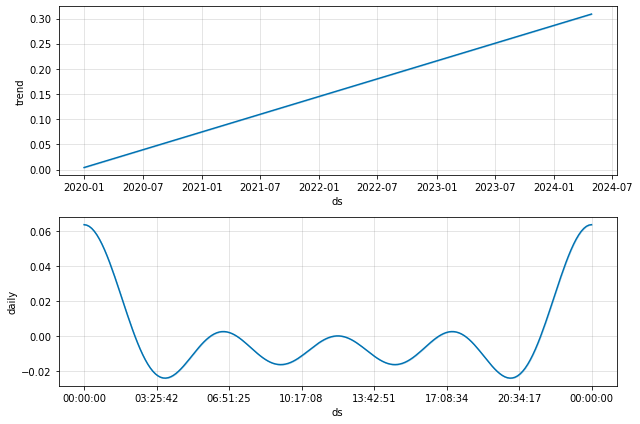

In [ ]:
plot8=m.plot_components(forecast)


COMORBILIDAD GENERAL POR COVID

In [ ]:
def conditiongroup(fila): # Función def recorre de forma controlada el objeto que definimos como Fila
    f=fila['Condition Group'] # r= posición que repetirá el numero de filas que tenga la columna.
    if f=='COVID-19': # condicion: si encuentra las palabras a la derecha de r==, entonces:
        fi=1 #respuesta que debe colocar 1
        return fi # Retorne la respuesta
    else: # Sino
        fi=0 # retorne 0 
        return fi
df_comorbidity.loc[:,['COVID-19Group']]=df_comorbidity.apply(conditiongroup,axis=1)



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_comorbidity

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,AlzheimerDiseaseGroup,CirculatoryDiseasesGroup,COVID-19Group
37260,08/29/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0,0,0,0
37261,08/29/2021,02/01/2020,02/29/2020,By Month,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,0,0,0,0
37262,08/29/2021,03/01/2020,03/31/2020,By Month,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9.0,9.0,0,0,0,0
37263,08/29/2021,04/01/2020,04/30/2020,By Month,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27.0,30.0,0,0,0,0
37264,08/29/2021,05/01/2020,05/31/2020,By Month,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19.0,19.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285655,08/29/2021,04/01/2021,04/30/2021,By Month,2021.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197.0,0,0,0,1
285656,08/29/2021,05/01/2021,05/31/2021,By Month,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,184.0,184.0,0,0,0,1
285657,08/29/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0,0,0,0,1
285658,08/29/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0,0,0,0,1


In [ ]:
df_comorbidity['COVID-19Group'].sum()

8313

In [ ]:
df_comorbidity7=df_comorbidity.groupby(by=['Start Date','End Date','Year','Month',]).agg({'COVID-19 Deaths':'sum',
                                                                                            'Number of Mentions':'sum',
                                                                                            'CausesResidualsGroup':'sum',
                                                                                          'COVID-19Group':'sum'}).reset_index()
df_comorbidity7


,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,COVID-19Group
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536,530
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423,439
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532,511
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403,420
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334,362
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382,401
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370,414
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355,412
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381,417
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343,387


In [ ]:
def tasadefucion(fila):
  causes=fila['COVID-19Group']
  deaths=fila['COVID-19 Deaths']
  if causes<deaths:
    percent_rate=((causes/deaths)*100)
    return percent_rate
  else:
    percent_rate=0
    return percent_rate
df_comorbidity7['%DeathsComorbidityCovid']=df_comorbidity7.apply(tasadefucion,axis=1)


In [ ]:
df_comorbidity7

,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions,CausesResidualsGroup,COVID-19Group,%DeathsComorbidityCovid
0,01/01/2020,01/31/2020,2020.0,1.0,50.0,54.0,536,530,0.000000
1,01/01/2021,01/31/2021,2021.0,1.0,1606132.0,1727834.0,423,439,0.027333
2,02/01/2020,02/29/2020,2020.0,2.0,140.0,152.0,532,511,0.000000
3,02/01/2021,02/28/2021,2021.0,2.0,745629.0,808837.0,403,420,0.056328
4,03/01/2020,03/31/2020,2020.0,3.0,91428.0,95469.0,334,362,0.395940
5,03/01/2021,03/31/2021,2021.0,3.0,349196.0,382162.0,382,401,0.114835
6,04/01/2020,04/30/2020,2020.0,4.0,893520.0,936481.0,370,414,0.046334
7,04/01/2021,04/30/2021,2021.0,4.0,272778.0,297733.0,355,412,0.151039
8,05/01/2020,05/31/2020,2020.0,5.0,540320.0,574031.0,381,417,0.077176
9,05/01/2021,05/31/2021,2021.0,5.0,217336.0,237971.0,343,387,0.178065


In [ ]:
df_comorbidity7['ds']=pd.DatetimeIndex(df_comorbidity7['Start Date'])
df_comorbidity7['y']=df_comorbidity7['%DeathsComorbidityCovid']
df_ComorbidityCovidGroup=df_comorbidity7[['ds','y']]
df_ComorbidityCovidGroup


,ds,y
0,2020-01-01,0.000000
1,2021-01-01,0.027333
2,2020-02-01,0.000000
3,2021-02-01,0.056328
4,2020-03-01,0.395940
5,2021-03-01,0.114835
6,2020-04-01,0.046334
7,2021-04-01,0.151039
8,2020-05-01,0.077176
9,2021-05-01,0.178065


In [ ]:
m=Prophet(interval_width=0.8,daily_seasonality=True)
model=m.fit(df_ComorbidityCovidGroup)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
future=m.make_future_dataframe(periods=1000,freq='D')
forecast=m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,0.003981,-0.060683,0.196416,0.003981,0.003981,0.063698,0.063698,0.063698,0.063698,0.063698,0.063698,0.0,0.0,0.0,0.067680
1,2020-02-01,0.009970,-0.045210,0.191226,0.009970,0.009970,0.063698,0.063698,0.063698,0.063698,0.063698,0.063698,0.0,0.0,0.0,0.073668
2,2020-03-01,0.015572,-0.053693,0.202709,0.015572,0.015572,0.063698,0.063698,0.063698,0.063698,0.063698,0.063698,0.0,0.0,0.0,0.079271
3,2020-04-01,0.021561,-0.033545,0.207285,0.021561,0.021561,0.063698,0.063698,0.063698,0.063698,0.063698,0.063698,0.0,0.0,0.0,0.085259
4,2020-05-01,0.027356,-0.030255,0.210087,0.027356,0.027356,0.063698,0.063698,0.063698,0.063698,0.063698,0.063698,0.0,0.0,0.0,0.091055


In [ ]:
forecast[['ds','yhat']]


,ds,yhat
0,2020-01-01,0.067680
1,2020-02-01,0.073668
2,2020-03-01,0.079271
3,2020-04-01,0.085259
4,2020-05-01,0.091055
...,...,...
1015,2024-04-23,0.371750
1016,2024-04-24,0.371944
1017,2024-04-25,0.372137
1018,2024-04-26,0.372330


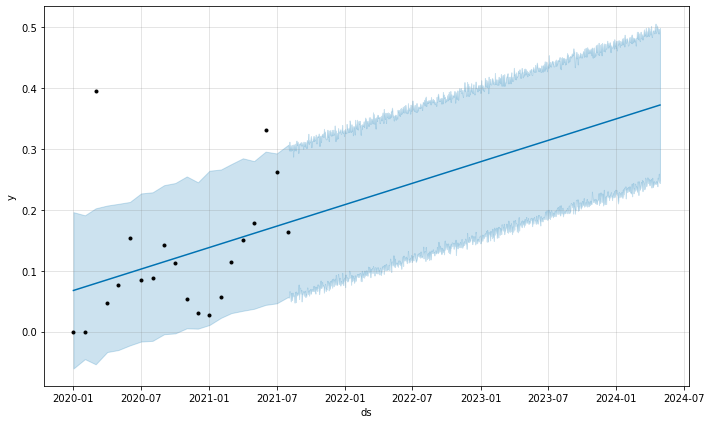

In [ ]:
plot9=m.plot(forecast)


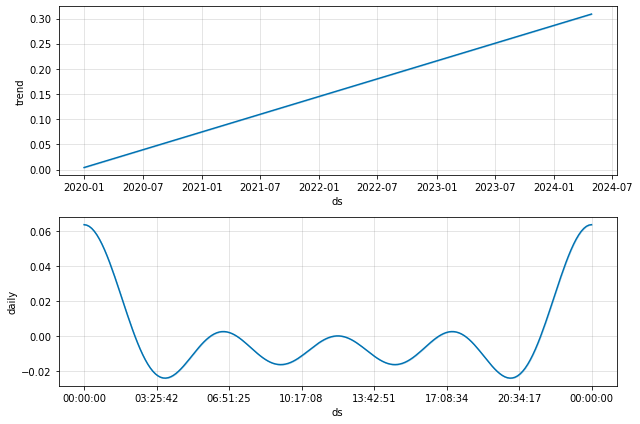

In [ ]:
plot10=m.plot_components(forecast)


In [ ]:
pip install fbprophet

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='180 days', horizon = '365 days')


INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-01 00:00:00 and 2020-08-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 5.


In [ ]:
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-01,0.123863,-0.015463,0.275719,0.141705,2020-08-01
1,2020-10-01,0.127802,-0.025683,0.274872,0.113470,2020-08-01
2,2020-11-01,0.131874,-0.013656,0.275453,0.053357,2020-08-01
3,2020-12-01,0.135814,-0.006224,0.278575,0.029866,2020-08-01
4,2021-01-01,0.139885,-0.008435,0.299732,0.027333,2020-08-01


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,0.000318,0.017842,0.017842,0.125910,0.125910,1.0
1,61 days,0.000205,0.014332,0.014332,0.126307,0.126307,1.0
2,92 days,0.006165,0.078517,0.078517,1.471534,1.471534,1.0
3,122 days,0.011225,0.105947,0.105947,3.547401,3.547401,1.0
4,153 days,0.012668,0.112552,0.112552,4.117847,4.117847,1.0


mse=error cuadrático medio

rmse=error cuadrático mediana

mae=error absoluto

mape=error absoluto porcentual promedio

mdape=cobertura de las estimaciones yhat_lower y yhat_upper

coverage=cobertura general.


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

distributed.nanny - WARNING - Restarting worker


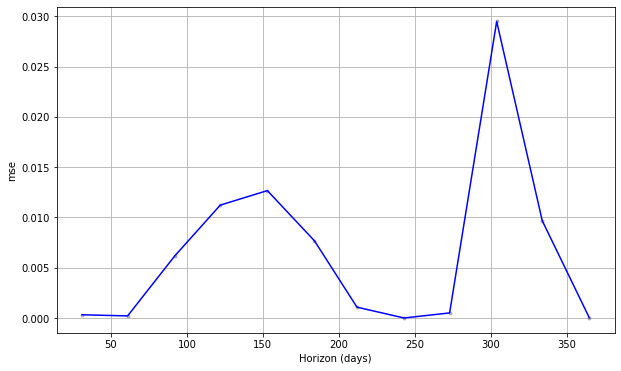

In [ ]:
fig1 = plot_cross_validation_metric(df_cv, metric='mse')

Como podemos ver el error medio tiende a sobrepasarse en los 300 dias, sin embargo vuelve a autoajustarse.

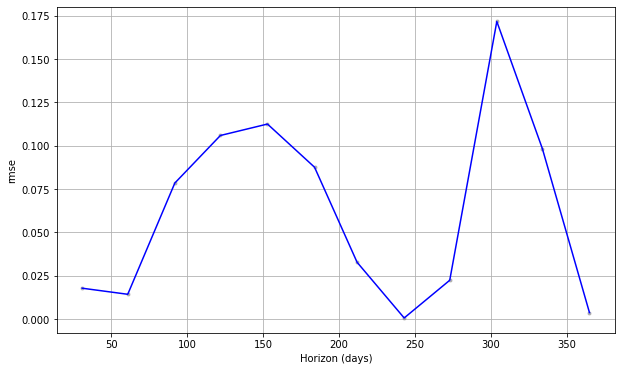

distributed.nanny - WARNING - Restarting worker


In [ ]:
fig2 = plot_cross_validation_metric(df_cv, metric='rmse')

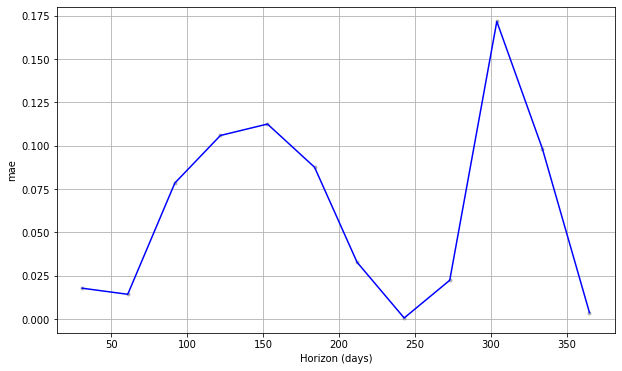

distributed.nanny - WARNING - Restarting worker


In [ ]:
fig3 = plot_cross_validation_metric(df_cv, metric='mae')

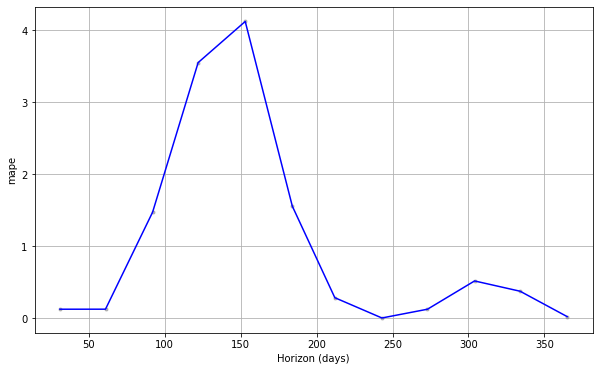

In [ ]:

fig4 = plot_cross_validation_metric(df_cv, metric='mape')

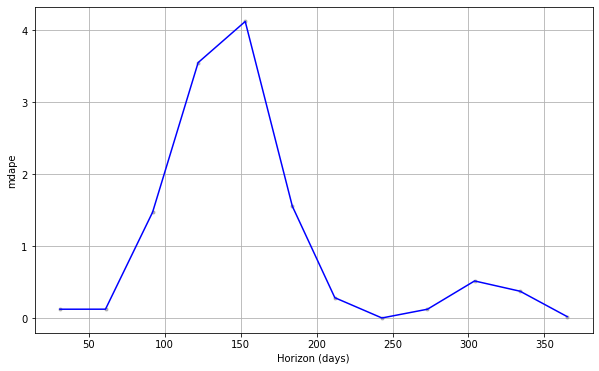

distributed.nanny - WARNING - Restarting worker


In [ ]:
fig5 = plot_cross_validation_metric(df_cv, metric='mdape')

En el caso del error absoluto este es significativamente pequeño pues a los 150 dias lo ubica al 4%.